In [3]:
%reload_ext autoreload
%autoreload 2

In [2]:
from npfd import data

# Make datasets
X_train, X_test, y_train, y_test = data.dataset.make_dataset('db1', clean_interim_dir=True)

INFO:root:Converting malte-uhma raw files to HTK format ...
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:root:Generating script (.scp) files...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Adding deltas and acelerations...
INFO:root:Test files:	168.0
INFO:root:Train files:	1434.0


In [5]:
from npfd.models.base import HiddenMarkovModel

gdt = 4
minvar = 0.001
varflo = 0.07
wip = 7
gsf = 5

model = HiddenMarkovModel()

model.initialize(X_train, init_method='HCompV', minimum_variance=minvar, variance_floor=varflo)

model.train(X_train, y_train, word_insertion_penalty=wip, grammar_scale_factor=gsf)

for i in range(1, gdt+1):
    
    model.edit([f'MU {2**i} {{*.state[2-4].mix}}'])
    model.train(X_train, y_train, word_insertion_penalty=wip, grammar_scale_factor=gsf)
    
results = model.test(X_test, y_test, gaussian_duplication_times=gdt)

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Editing model 0
INFO:root:Most trained model: 1
INFO:root:Training the model...


Calculating Fixed Variance
  HMM Prototype: /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/proto
  Segment Label: None
  Num Streams  : 1
  UpdatingMeans: Yes
  Target Direct: /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/0
206496 speech frames accumulated
Updating HMM Means and Covariances
Output written to directory /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/0
Var floor macros output to file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/0/vFloors

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks
HHEd
 2/2 Models Loaded [5 states max, 1 mixes max]

MU 2 {}
 Mixup to 2 components per stream
 MU: Number of mixes increased from 6 to 12

Saving new HMM files ...
Edit Complete

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 4
INFO:root:Editing model 4
INFO:root:Most trained model: 5
INFO:root:Training the model...


Pruning-Off

HHEd
 2/2 Models Loaded [5 states max, 2 mixes max]

MU 4 {}
 Mixup to 4 components per stream
 MU: Number of mixes increased from 12 to 24

Saving new HMM files ...
Edit Complete

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 8
INFO:root:Editing model 8
INFO:root:Most trained model: 9
INFO:root:Training the model...


Pruning-Off

HHEd
 2/2 Models Loaded [5 states max, 4 mixes max]

MU 8 {}
 Mixup to 8 components per stream
 MU: Number of mixes increased from 24 to 48

Saving new HMM files ...
Edit Complete

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 12
INFO:root:Editing model 12
INFO:root:Most trained model: 13
INFO:root:Training the model...


Pruning-Off

HHEd
 2/2 Models Loaded [5 states max, 8 mixes max]

MU 16 {}
 Mixup to 16 components per stream
 MU: Number of mixes increased from 48 to 96

Saving new HMM files ...
Edit Complete

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 16
INFO:root:Testing model: 16


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/16/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/16/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/db1_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Thu Jul  1 15:19:20 2021
  Ref : >Documentos/Facultad/Tesis/models/bdb/data/interim/db1_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interi

TypeError: 'PosixPath' object is not subscriptable

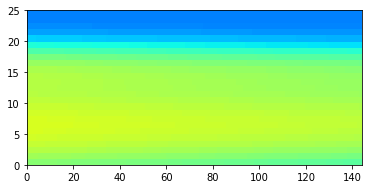

In [33]:
from npfd import visualization as viz

viz.visualize.generate_plots('synth', X_test, y_test, results)

In [18]:
file = '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/db1_test/170501'
y_test

{'mlf': PosixPath('/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/db1_test_labels.mlf'),
 'count': None,
 'id': '2.test.synth.synth'}

In [31]:
_, obs, delta, acc = data.htk.read_data(file)
file_length = obs.__len__()
mlf = y_test['mlf']
date = file
file_length = file_length
print(date.stem())
# with open(mlf, 'rt') as fi:
#     if fi.readline() != '#!MLF!#\n':
#         print('Not a MLF file')
    
#     tmp_line = fi.readline().splitlines()[0]
#     while not (tmp_line.endswith(date + '.rec"') or tmp_line.endswith(date + '.lab"')):
#         print(tmp_line)
#         tmp_line = fi.readline().splitlines()[0]
        

AttributeError: 'str' object has no attribute 'stem'

In [22]:
fi.readline().splitlines()

ValueError: I/O operation on closed file.

In [ ]:
start = []
end = []
label = []

tmp_line = fi.readline().splitlines()[0]
while not (tmp_line.endswith(date + '.rec"') or tmp_line.endswith(date + '.lab"')):
    tmp_line = fi.readline().splitlines()[0]